In [100]:
# 2.0.0 Descriptive data

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import time

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [102]:
import sys
sys.path.append("../") 

from utils.paths2 import direcciones_cursos

G_raw, G_processed, G_interim, G_external, G_models, G_reports, G_reports_figures = direcciones_cursos('italian')

In [128]:
labels = {'date':'Date', 
          'total':'Total',
          'holiday':'Holiday',
          'variable':'Variables',
          'value':'Value',
          'wind_speed_min':'Wind speed min', 
          'wind_speed_mean':'Wind speed mean', 
          'wind_speed_max':'Wind speed max',
          'temperature_min':'Temperature min', 
          'temperature_mean':'Temperature mean',
          'temperature_max':'Temperature max',
          }

In [104]:
start = time.time()
df = pd.read_parquet(G_processed/'df.parquet.gzip')
end = time.time()
pd_read = round(end - start, 3)
pd_read


0.04

In [105]:
df.head()

,wind_speed,humidity,temperature,holiday,week_day,non_working_day,season,weather,date,year,month,time,total
0,0.0,0.81,0.24,0,6,0,1,1,2011-01-01,0,1,0,18
1,0.0,0.80,0.22,0,6,0,1,1,2011-01-01,0,1,1,45
2,0.0,0.80,0.22,0,6,0,1,1,2011-01-01,0,1,2,37
3,0.0,0.75,0.24,0,6,0,1,1,2011-01-01,0,1,3,18
4,0.0,0.75,0.24,0,6,0,1,1,2011-01-01,0,1,4,5


In [106]:
df['year-month'] = df['date'].dt.to_period('M').astype(str)
# df = df.with_columns(year_month=pl.col('date').dt.strftime('%Y-%m'))
df.head()

,wind_speed,humidity,temperature,holiday,week_day,non_working_day,season,weather,date,year,month,time,total,year-month
0,0.0,0.81,0.24,0,6,0,1,1,2011-01-01,0,1,0,18,2011-01
1,0.0,0.80,0.22,0,6,0,1,1,2011-01-01,0,1,1,45,2011-01
2,0.0,0.80,0.22,0,6,0,1,1,2011-01-01,0,1,2,37,2011-01
3,0.0,0.75,0.24,0,6,0,1,1,2011-01-01,0,1,3,18,2011-01
4,0.0,0.75,0.24,0,6,0,1,1,2011-01-01,0,1,4,5,2011-01


# Describe

In [107]:
df.describe()

,wind_speed,humidity,temperature,total
count,13905.000000,13905.000000,13905.000000,13905.000000
mean,0.190215,0.628570,0.497470,193.266163
std,0.122282,0.192186,0.191592,181.161178
min,0.000000,0.000000,0.020000,1.000000
25%,0.104500,0.480000,0.340000,44.000000
50%,0.194000,0.630000,0.500000,146.000000
75%,0.253700,0.780000,0.660000,285.000000
max,0.850700,1.000000,1.000000,979.000000


In [108]:
fig = px.histogram(df, x='total', 
                   labels=labels)
fig.show()

In [109]:
fig = px.line(df, x='date', y='total', 
              labels=labels,
              title='Total per day')
fig.show()

<AxesSubplot: >

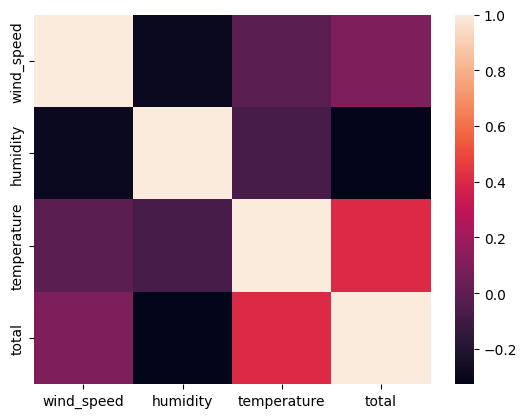

In [110]:
sns.heatmap(df.corr(), 
        xticklabels = df.corr().columns,
        yticklabels = df.corr().columns)

In [111]:
fig = px.histogram(df, x='holiday', 
                labels=labels)
fig.update_xaxes(
    tickvals=[0,1],
    ticktext=['No','Yes'])
fig.show()

In [112]:
df_time = df.groupby(['year-month'])['wind_speed','humidity','temperature'].agg(['mean', 'min', 'max']).reset_index()
df_time.head()

year-month wind_speed               humidity            temperature        \
                   mean  min     max      mean   min  max        mean   min   
0    2011-01   0.197405  0.0  0.5821  0.579608  0.21  1.0    0.197985  0.02   
1    2011-02   0.228773  0.0  0.8060  0.561066  0.10  1.0    0.284109  0.06   
2    2011-03   0.229889  0.0  0.6418  0.572355  0.00  1.0    0.333533  0.12   
3    2011-04   0.245654  0.0  0.6119  0.677145  0.22  1.0    0.472561  0.24   
4    2011-05   0.181883  0.0  0.6119  0.714225  0.24  1.0    0.578891  0.34   

         
    max  
0  0.46  
1  0.66  
2  0.70  
3  0.76  
4  0.90

In [113]:
df.head()

,wind_speed,humidity,temperature,holiday,week_day,non_working_day,season,weather,date,year,month,time,total,year-month
0,0.0,0.81,0.24,0,6,0,1,1,2011-01-01,0,1,0,18,2011-01
1,0.0,0.80,0.22,0,6,0,1,1,2011-01-01,0,1,1,45,2011-01
2,0.0,0.80,0.22,0,6,0,1,1,2011-01-01,0,1,2,37,2011-01
3,0.0,0.75,0.24,0,6,0,1,1,2011-01-01,0,1,3,18,2011-01
4,0.0,0.75,0.24,0,6,0,1,1,2011-01-01,0,1,4,5,2011-01


In [114]:
df[["temperature","wind_speed"]].describe([0.01,0.05,0.10,0.13,0.25,0.50,0.60,0.75,0.8,0.90,0.95, 0.99])

,temperature,wind_speed
count,13905.000000,13905.000000
mean,0.497470,0.190215
std,0.191592,0.122282
min,0.020000,0.000000
1%,0.120000,0.000000
5%,0.200000,0.000000
10%,0.240000,0.000000
13%,0.260000,0.089600
25%,0.340000,0.104500
50%,0.500000,0.194000


In [115]:
df['week_day'].value_counts(normalize=True)

6    0.145343
1    0.143761
0    0.143258
4    0.142395
2    0.142323
3    0.142035
5    0.140885
Name: week_day, dtype: float64

In [116]:
df.groupby('week_day')['temperature'].apply(lambda x: x.value_counts().nlargest(1).index[0])

week_day
0    0.36
1    0.56
2    0.60
3    0.70
4    0.62
5    0.34
6    0.26
Name: temperature, dtype: float64

In [117]:
descripcion_porcentaje = df.groupby('week_day')['temperature'].describe(percentiles=[.25, .5, .75]).reset_index()#.iloc[:,[1,4]]
descripcion_porcentaje

,week_day,count,mean,std,min,25%,50%,75%,max
0,0,1992.0,0.485653,0.193367,0.02,0.34,0.48,0.64,0.96
1,1,1999.0,0.493217,0.192766,0.02,0.34,0.52,0.64,0.92
2,2,1979.0,0.508065,0.186010,0.10,0.36,0.52,0.66,0.94
3,3,1975.0,0.507139,0.191132,0.02,0.34,0.52,0.66,0.94
4,4,1980.0,0.508091,0.189361,0.10,0.34,0.50,0.66,0.94
5,5,1959.0,0.496713,0.191257,0.06,0.34,0.50,0.66,0.96
6,6,2021.0,0.483830,0.195536,0.02,0.32,0.48,0.64,1.00


In [118]:
descripcion_porcentaje = df.groupby('week_day')['temperature'].describe(percentiles=[.25, .5, .75]).reset_index().iloc[:,[0,4,5,6,7,8]]
descripcion_porcentaje

,week_day,min,25%,50%,75%,max
0,0,0.02,0.34,0.48,0.64,0.96
1,1,0.02,0.34,0.52,0.64,0.92
2,2,0.10,0.36,0.52,0.66,0.94
3,3,0.02,0.34,0.52,0.66,0.94
4,4,0.10,0.34,0.50,0.66,0.94
5,5,0.06,0.34,0.50,0.66,0.96
6,6,0.02,0.32,0.48,0.64,1.00


In [119]:
df[df['week_day'] == '4']['temperature'].min()

0.1

In [120]:
ndf = df.groupby(pd.Grouper(key='date', freq='M')).agg({
    'wind_speed': ['min', 'mean', 'max'],
    'humidity': ['min', 'mean', 'max'],
    'temperature': ['min', 'mean', 'max'],
})
ndf.columns = ndf.columns.map('_'.join)
ndf = ndf.reset_index()
ndf.head()

,date,wind_speed_min,wind_speed_mean,wind_speed_max,humidity_min,humidity_mean,humidity_max,temperature_min,temperature_mean,temperature_max
0,2011-01-31,0.0,0.197405,0.5821,0.21,0.579608,1.0,0.02,0.197985,0.46
1,2011-02-28,0.0,0.228773,0.8060,0.10,0.561066,1.0,0.06,0.284109,0.66
2,2011-03-31,0.0,0.229889,0.6418,0.00,0.572355,1.0,0.12,0.333533,0.70
3,2011-04-30,0.0,0.245654,0.6119,0.22,0.677145,1.0,0.24,0.472561,0.76
4,2011-05-31,0.0,0.181883,0.6119,0.24,0.714225,1.0,0.34,0.578891,0.90


In [121]:
ndf.columns

Index(['date', 'wind_speed_min', 'wind_speed_mean', 'wind_speed_max',
       'humidity_min', 'humidity_mean', 'humidity_max', 'temperature_min',
       'temperature_mean', 'temperature_max'],
      dtype='object')

In [122]:
# Wind speed
fig = px.line(ndf, x='date', y=['wind_speed_min', 'wind_speed_mean', 'wind_speed_max'], 
              title = 'Wind speed',
              color_discrete_sequence=['red', 'green', 'blue'],
              labels=labels,
              )
fig.update_traces(mode='markers+lines')
fig.update_layout(xaxis=dict(tickformat="%B-%Y"), 
                  template = "plotly_dark",
                  )
fig.show()

In [123]:
# Humidity
fig = px.line(ndf, x='date', y=['humidity_min', 'humidity_mean', 'humidity_max'], 
              title = 'Humidity',
              color_discrete_sequence=['red', 'green', 'blue'],
              labels=labels,
              )
fig.update_traces(mode='markers+lines')
fig.update_layout(xaxis=dict(tickformat="%B-%Y"), 
                  template = "plotly_dark",
                  )
fig.show()

In [124]:
# Temperature
fig = px.line(ndf, x='date', y=['temperature_min', 'temperature_mean', 'temperature_max'], 
              title = 'Temperature',
              color_discrete_sequence=['red', 'green', 'blue'],
              labels=labels,
              )
fig.update_traces(mode='markers+lines')
fig.update_layout(xaxis=dict(tickformat="%B-%Y"), 
                  template = "plotly_dark",
                  )
fig.show()

In [125]:
print('_ok')

_ok
